IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

# Plus de données pour du clustering

Dans ce notebook, vous trouverez des jeux de données en 2D différents afin d'expérimenter vos algorithmes de clustering hiérarchique et des k-moyennes.

## Préparation 

Ce notebook utilise les fonctions des TDTME 8 et 9 que vous avez réalisées et qui, ensuite, ont été placées dans le fichier `Clustering.py` de votre librairie `iads`.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Nouvelles données 

Placer le fichier `base-2D-diff.csv` dans le répertoire `data`.

Il y a 23 exemples dans la base.


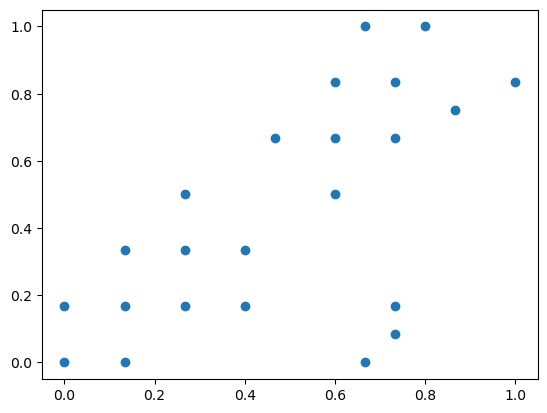

In [2]:
data_2D_diff = clust.normalisation(pd.read_csv("data/base-2D-diff.csv"))
# ------------------------ 

print("Il y a", len(data_2D_diff), "exemples dans la base.")

data_2D_diff

plt.scatter(data_2D_diff['X1'],data_2D_diff['X2'],)


## Retour sur le clustering hiérarchique

Dans cette partie, vous devez avoir implémenter les 4 fonctions de clustering hiérarchique ascendant en écrivant une fonction `CHA` qui prend les mêmes arguments que chacune des 4 fonctions précédentes, et un argument suplémentaire `linkage`, qui est une chaîne de caractères parmi `"centroid"` (valeur par défaut),  `"complete"`,`"simple"`, et `"average"` et qui donne le nom de l'approche linkage à utiliser pour construire le clustering.

La spécification de la fonction à écrire est la suivante:

    def CHA(DF,linkage='centroid', verbose=False,dendrogramme=False):
        """ Paramètres d'entrée:
                - DF: dataframe avec les données
                - linkage: 'centroid', 'complete', 'simple', ou 'average'
                - verbose: selon que l'on veut des affichages des étapes ou pas
                - dendrogramme: affiche le dendrogramme final ou pas
            rend liste des partitions obtenues à chaque étape de l'algorithme
            version approche complete
        """


Distance mininimale trouvée entre [16, 17]  =  0.08333333333333333
Distance mininimale trouvée entre [10, 12]  =  0.1333333333333333
Distance mininimale trouvée entre [13, 19]  =  0.1333333333333333
Distance mininimale trouvée entre [0, 2]  =  0.13333333333333333
Distance mininimale trouvée entre [1, 3]  =  0.13333333333333333
Distance mininimale trouvée entre [4, 6]  =  0.13333333333333333
Distance mininimale trouvée entre [5, 8]  =  0.13333333333333336
Distance mininimale trouvée entre [15, 20]  =  0.13333333333333341
Distance mininimale trouvée entre [14, 16, 17]  =  0.14166666666666666
Distance mininimale trouvée entre [21, 22]  =  0.15723301886761007
Distance mininimale trouvée entre [0, 2, 1, 3]  =  0.16666666666666666
Distance mininimale trouvée entre [11, 10, 12]  =  0.1795054935711501
Distance mininimale trouvée entre [7, 4, 6]  =  0.17950549357115014
Distance mininimale trouvée entre [9, 5, 8]  =  0.17950549357115014
Distance mininimale trouvée entre [13, 19, 15, 20]  =  0.17

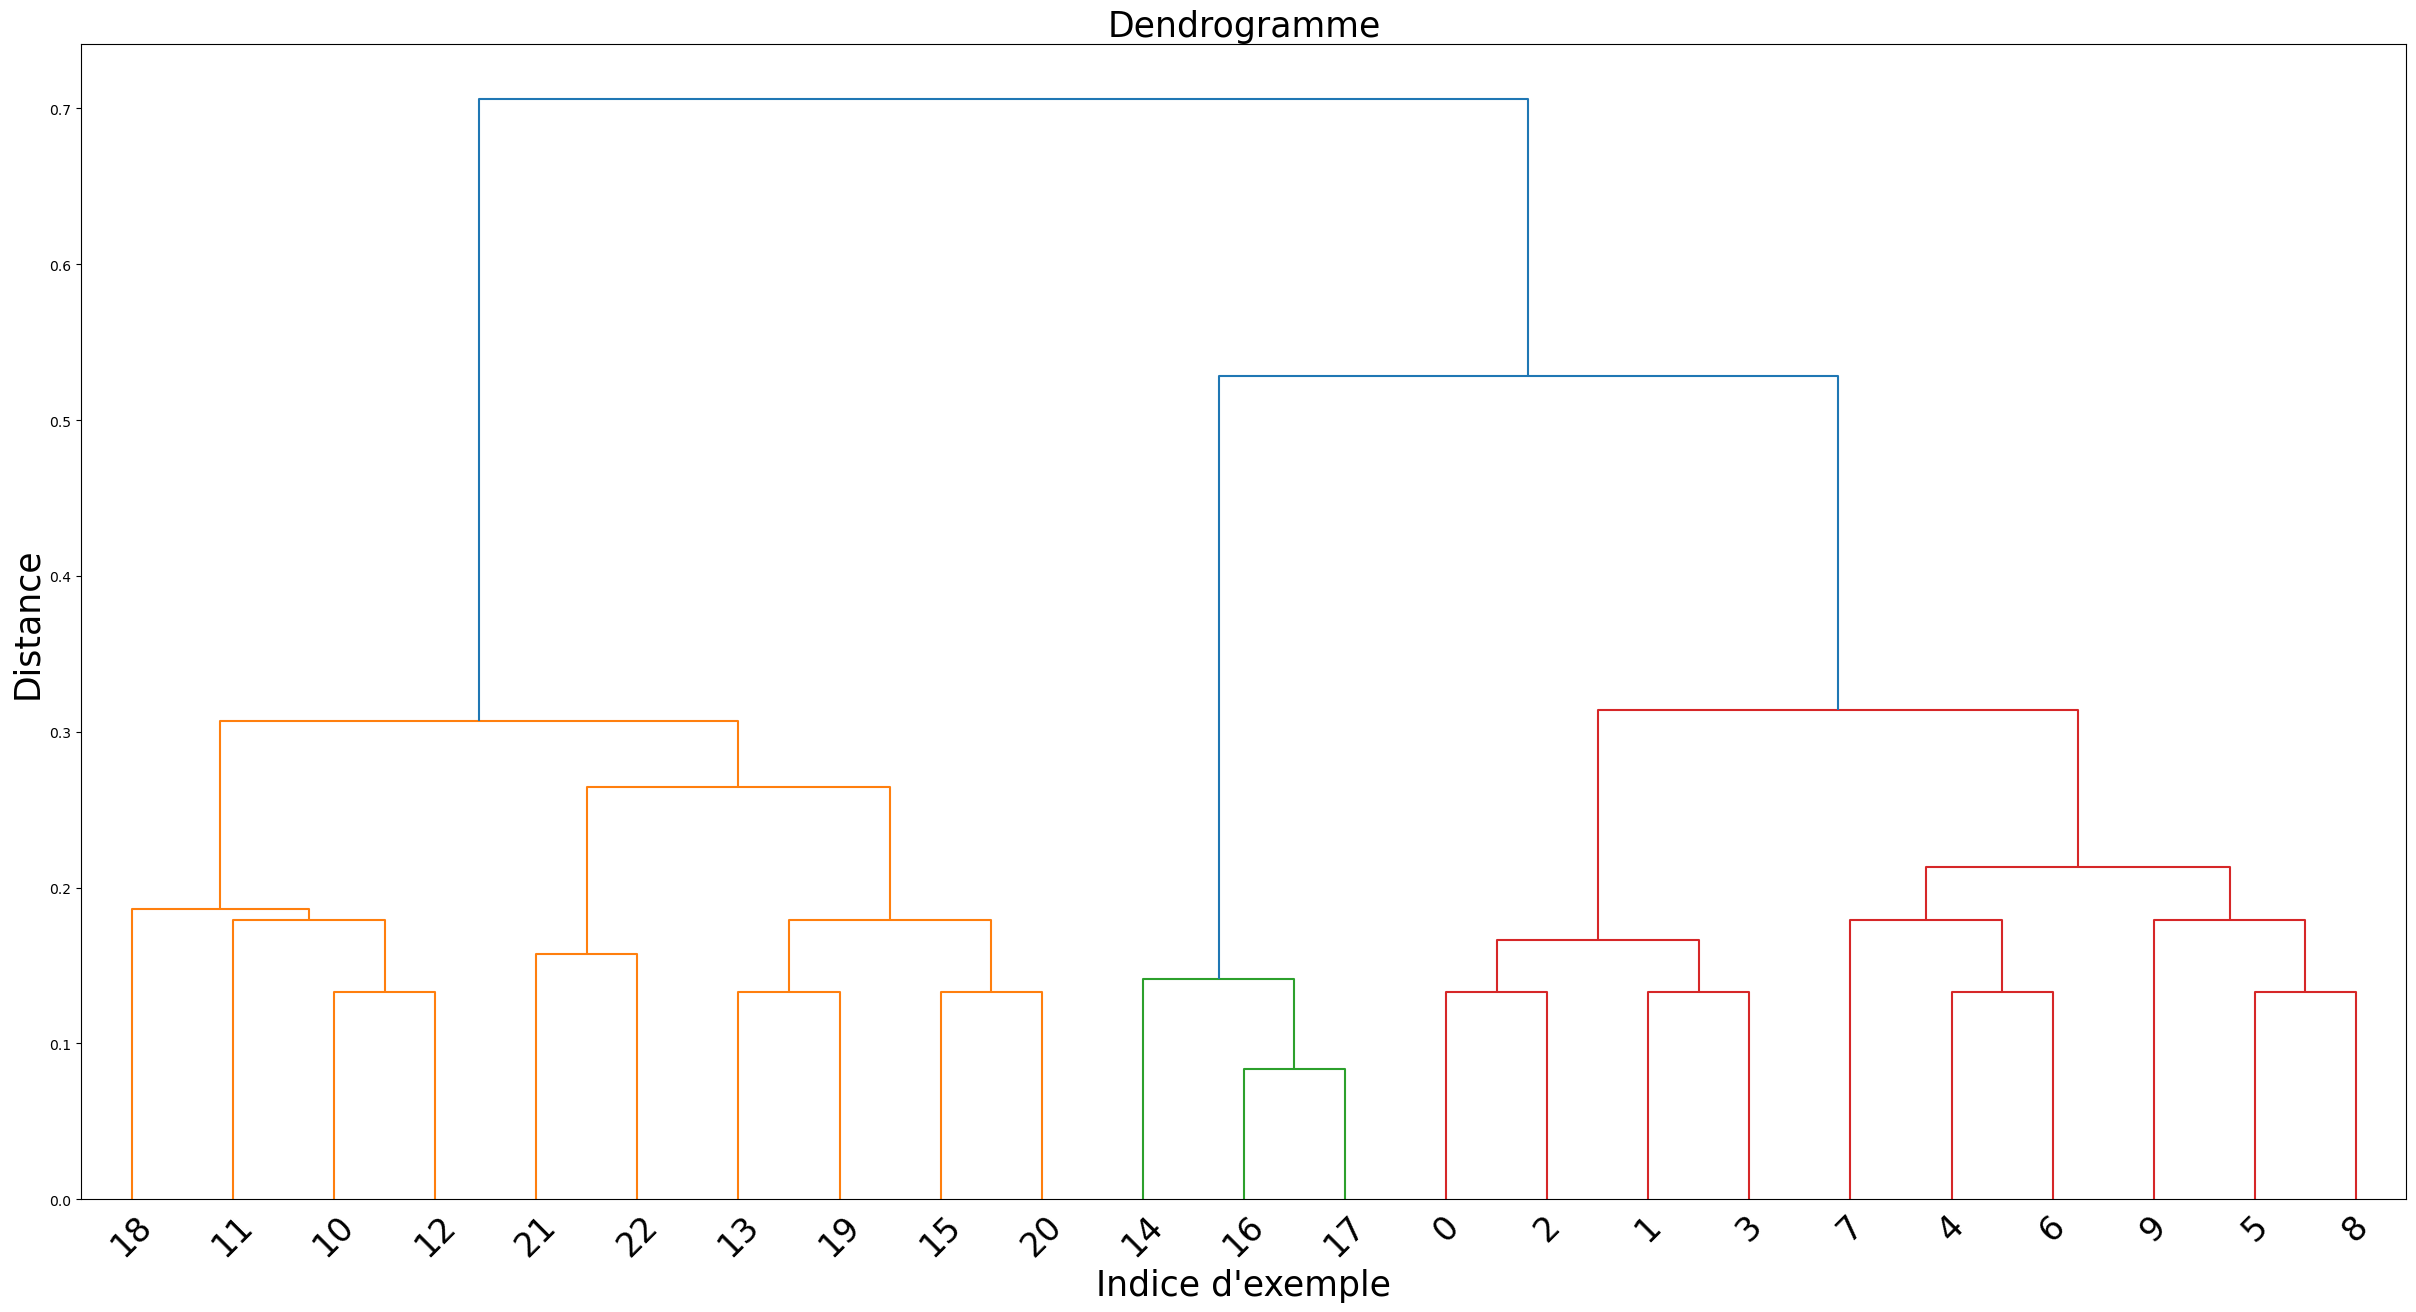

In [3]:
res_centroid = clust.CHA(data_2D_diff,linkage='centroid',verbose=True,dendrogramme=True)

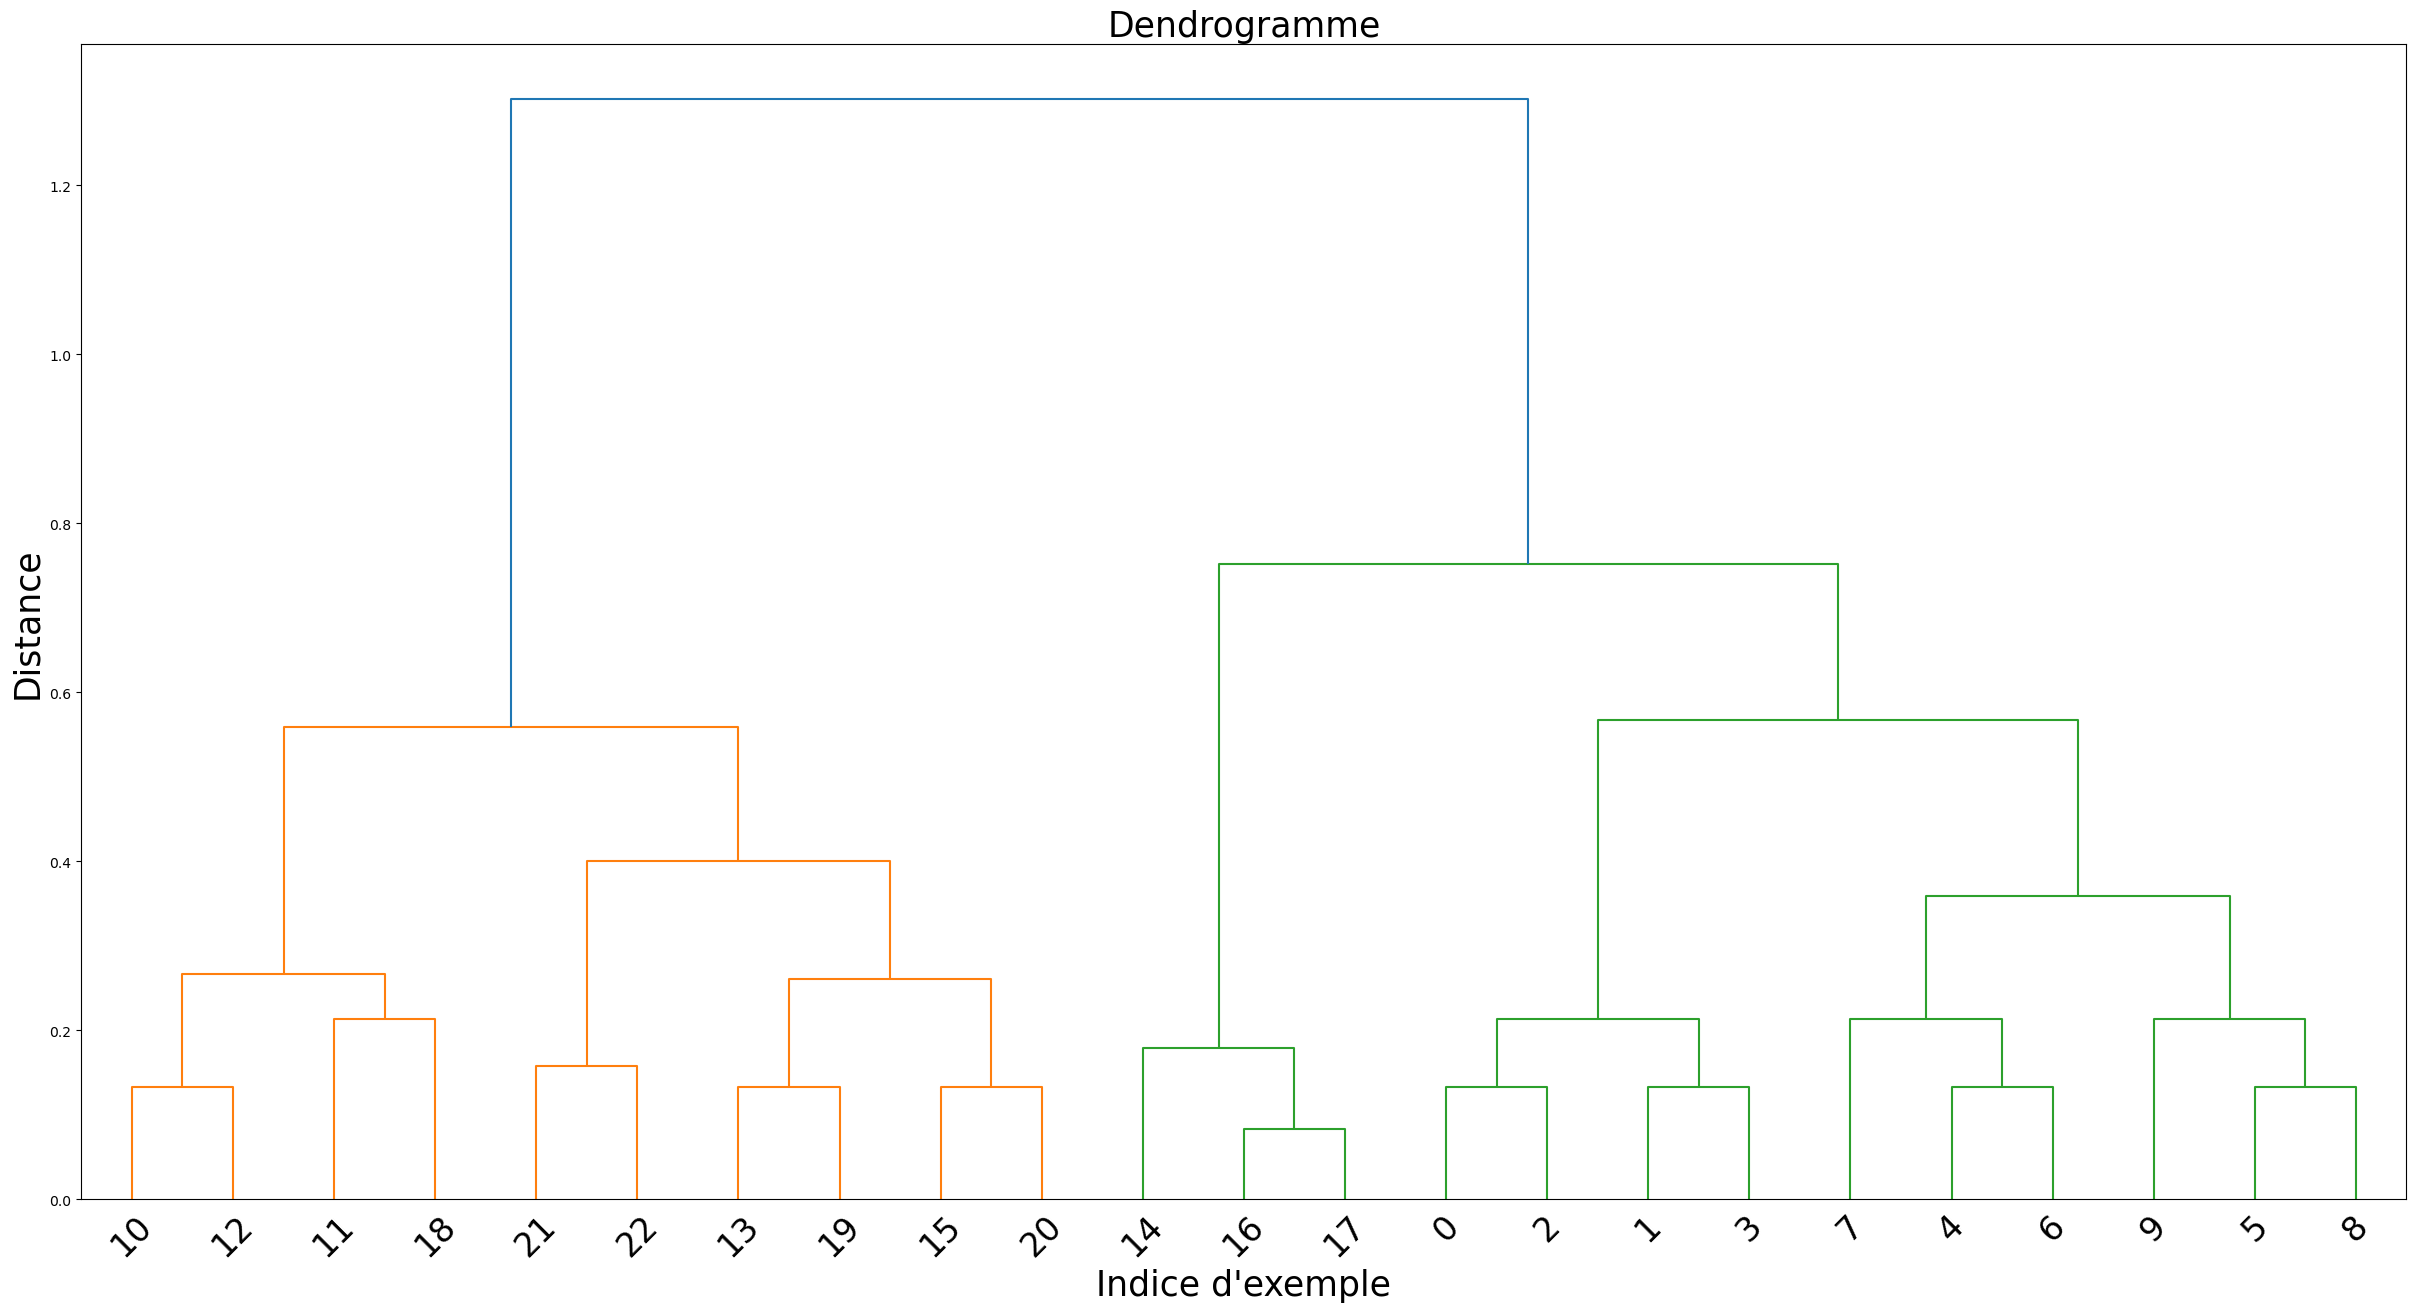

In [4]:
res_complete = clust.CHA(data_2D_diff,linkage='complete',verbose=False,dendrogramme=True)

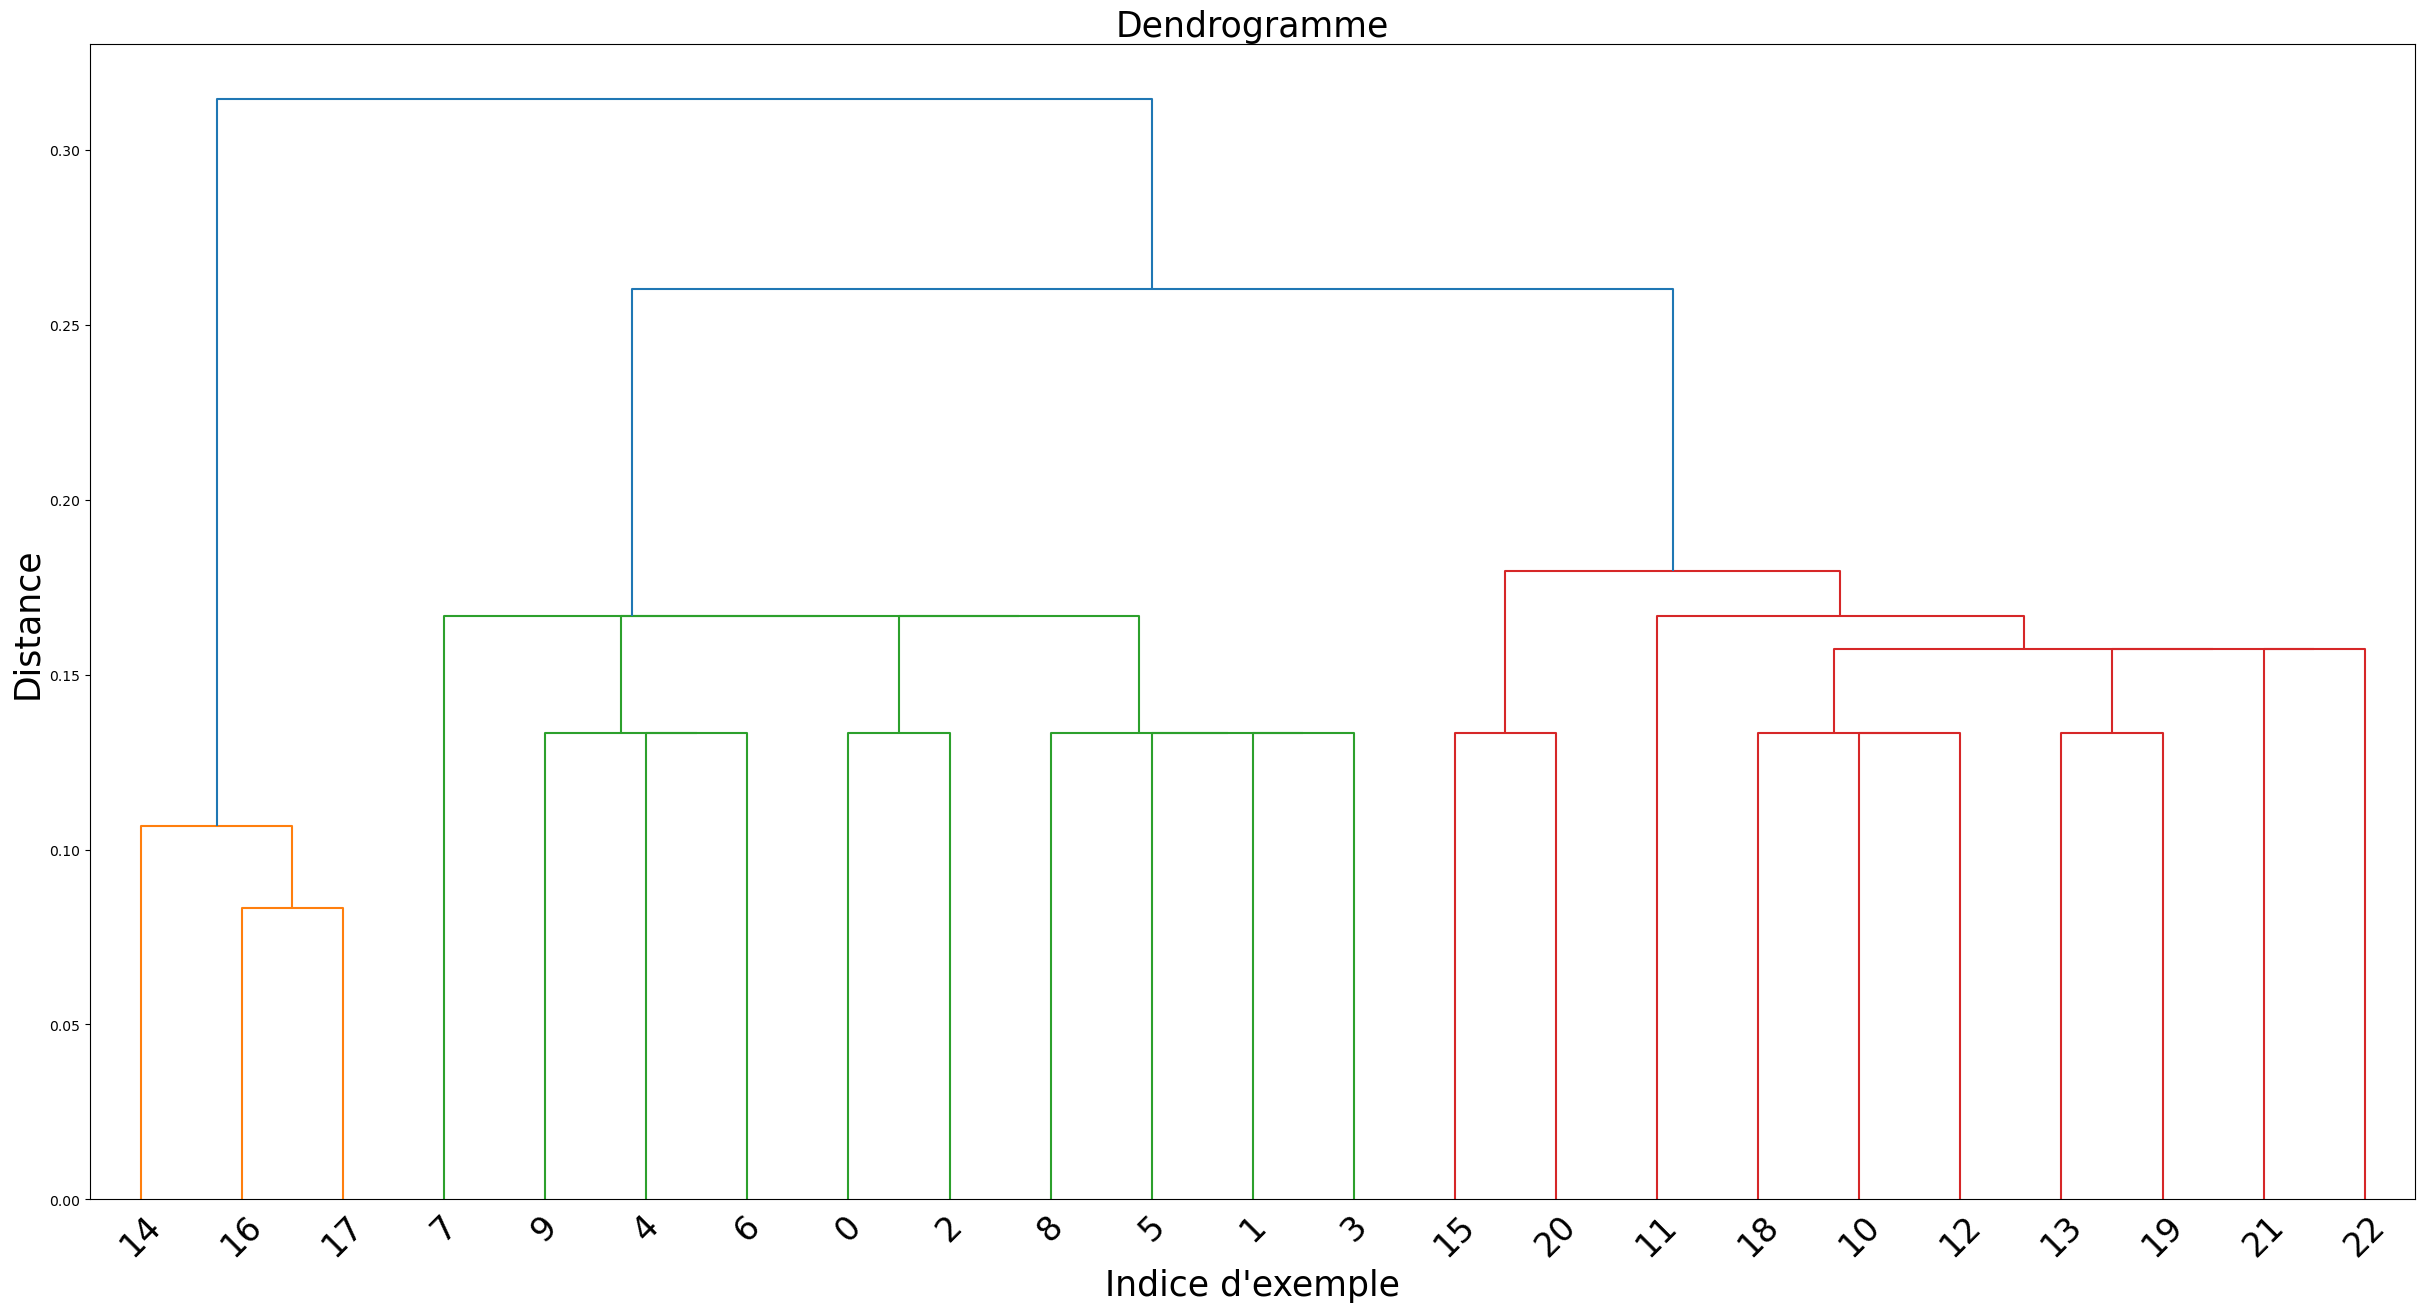

In [5]:
res_simple = clust.CHA(data_2D_diff,linkage='simple',verbose=False,dendrogramme=True)

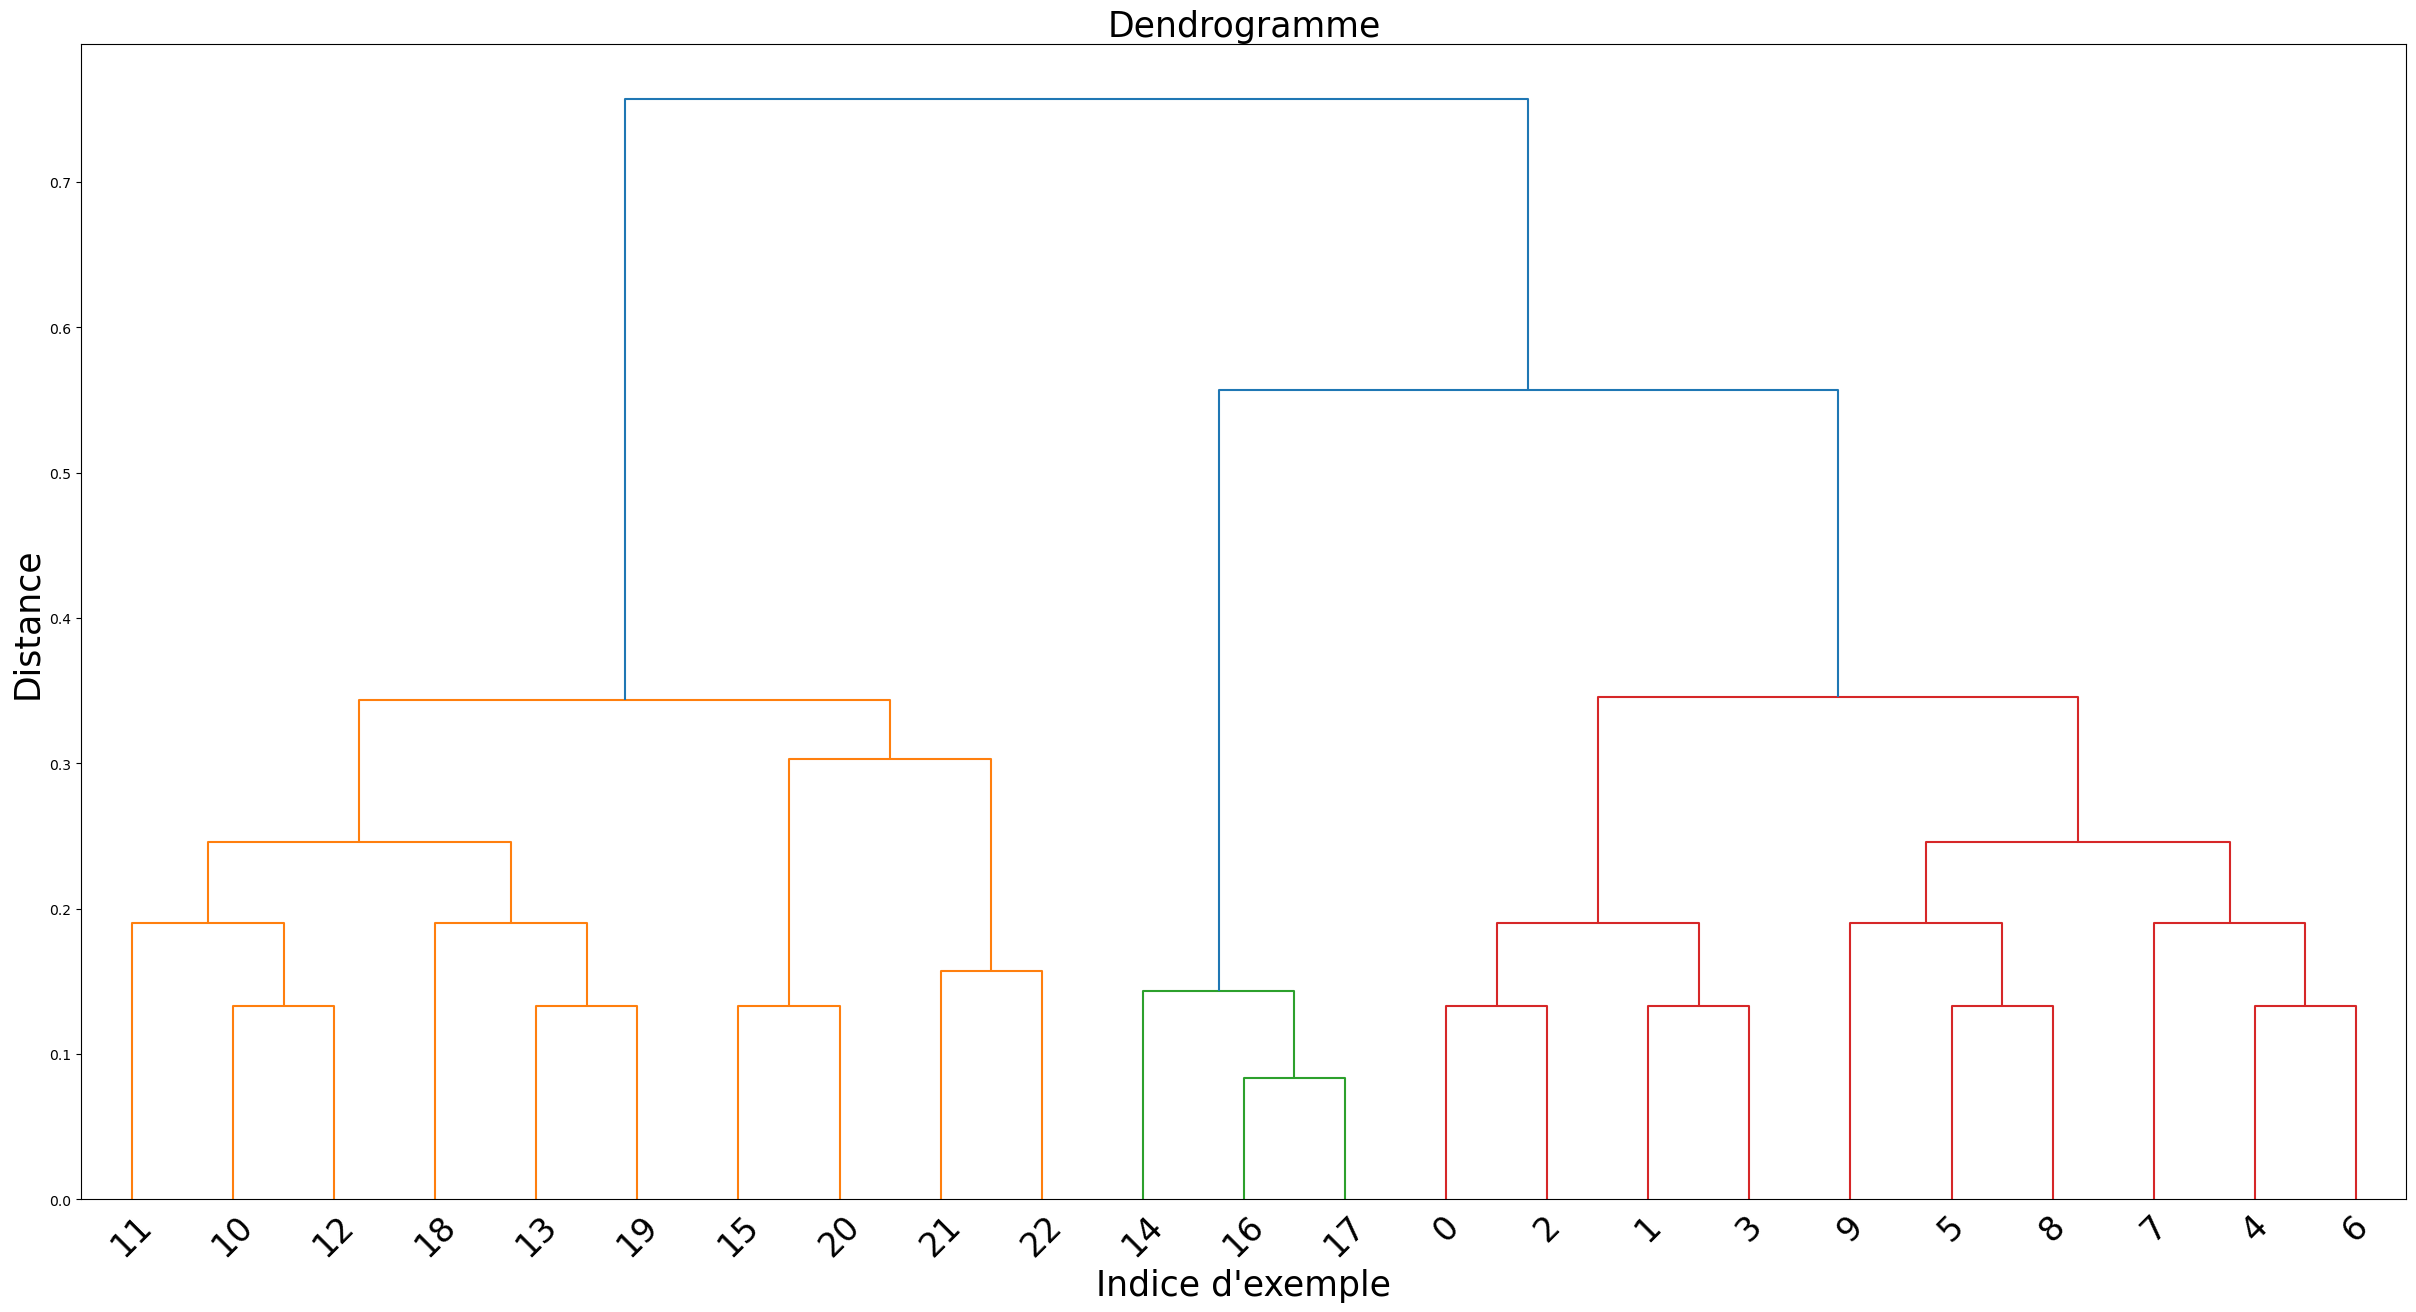

In [6]:
res_average = clust.CHA(data_2D_diff,linkage='average',verbose=False,dendrogramme=True)

## Retour sur les k-moyennes

Expérimentation sur les données 2D précédentes

Affichage des centres:  [[0.71851852 0.80555556]
 [0.50833333 0.26041667]
 [0.11111111 0.13888889]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [7, 8, 9, 11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6]}


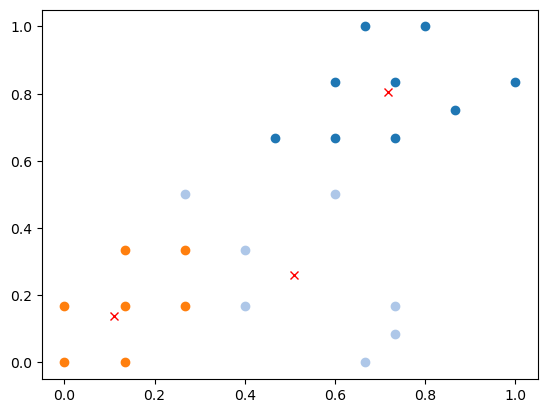

In [7]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_2D_diff,les_centres,l_affectation)


Affichage des centres:  [[0.71851852 0.80555556]
 [0.68333333 0.1875    ]
 [0.2        0.21666667]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}


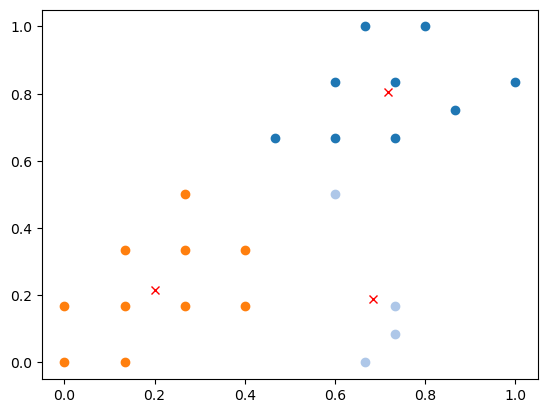

In [8]:
np.random.seed(1)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_2D_diff,les_centres,l_affectation)


## Beaucoup de points...

On essaye en générant aléatoire 1000 points, toujours en 2 dimensions.
Pour cela, on reprend la fonction `nb.random.multivariate_normal` que l'on a déjà utilisé dans le TME 2. On va générer la moitié des points selon une gaussienne centrée sur $(2,1)$ et l'autre moitié des points selon une gaussienne centrée sur $(-2-2)$. De cette façon, on créé artificiellement 2 paquets de points et on va regarder si l'algorithme des k-moyennes peut arriver à les retrouver.

Taille du dataset généré : 1000 exemples


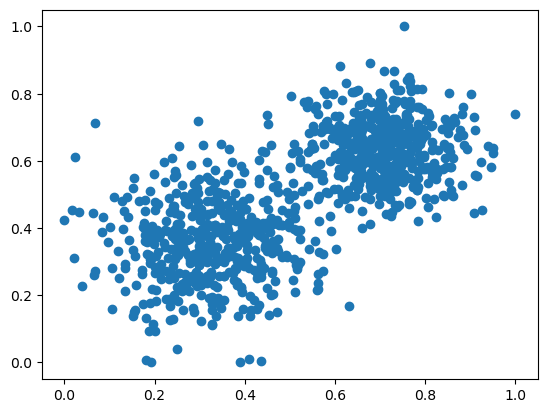

In [9]:
np.random.seed(42)   # on prend 42 comme graine


nb_points = 500 

# génération des groupes de points 
cluster1_centre = np.array([2,1])
cluster1_sigma = np.array([[1,0],[0,1]])
cluster2_centre = np.array([-2,-2])
cluster2_sigma = np.array([[1.5,0],[0,1.5]])
cluster1_points = np.random.multivariate_normal(cluster1_centre,cluster1_sigma,nb_points)
cluster2_points = np.random.multivariate_normal(cluster2_centre,cluster2_sigma,nb_points)

# on stocke les points dans un dataframe (en les normalisant)
desc = np.concatenate((cluster1_points, cluster2_points))
data_rand = clust.normalisation(pd.DataFrame(desc,columns=['X1','X2']))
    
print("Taille du dataset généré :", data_rand.shape[0], "exemples")

# Affichage des points obtenus:
plt.scatter(data_rand['X1'],data_rand['X2'])



Pour k= 2 
Affichage des centres:  [[0.70030532 0.63310693]
 [0.32219792 0.34976565]]


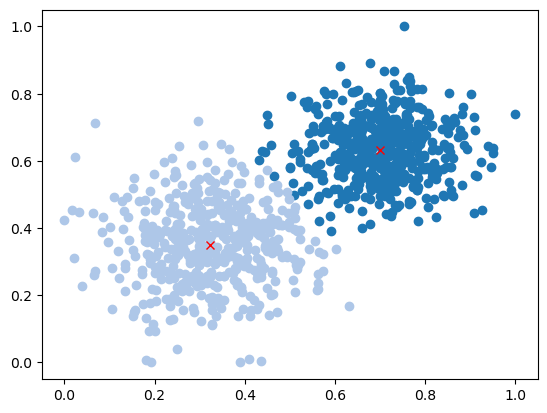

In [10]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

val_k = 2
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)


Pour k= 4 
Affichage des centres:  [[0.70819669 0.63670188]
 [0.19521444 0.37895914]
 [0.34805922 0.24277949]
 [0.39602839 0.45782145]]


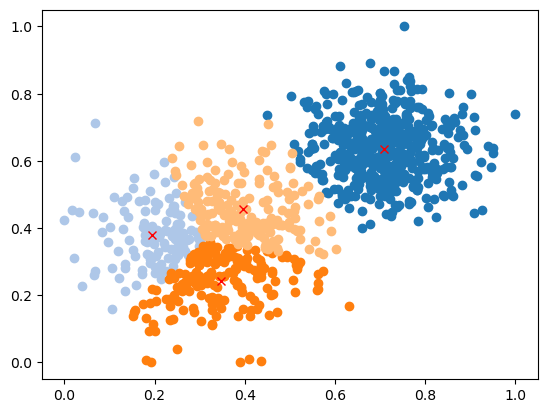

In [11]:
# On peut essayer avec plus de clusters que prévu :

np.random.seed(42)   

val_k = 4
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)


Pour k= 4 
Affichage des centres:  [[0.32764404 0.45910879]
 [0.32185729 0.26648635]
 [0.74272566 0.57193156]
 [0.66051152 0.70375276]]


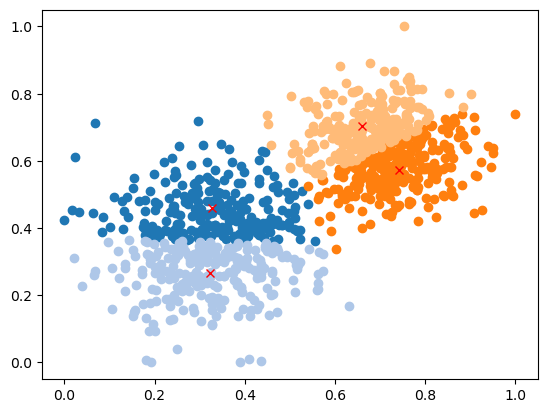

In [12]:
# Autre exécution avec le même k que précédemment

np.random.seed(2023)  

val_k = 4
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)


## Poursuivre les expériences...

Sur le même principe, générer plus de 2 groupes de points (par exemple, 4 ou 5) et appliquer les k-moyennes pour voir si les groupes sont retrouvés.

Utiliser les indices vus en cours pour évaluer les résultats des clustering obtenus.

Pour k= 4 
Affichage des centres:  [[0.58111941 0.66035375]
 [0.70992913 0.54068047]
 [0.3171594  0.34271473]
 [0.77254704 0.70257153]]


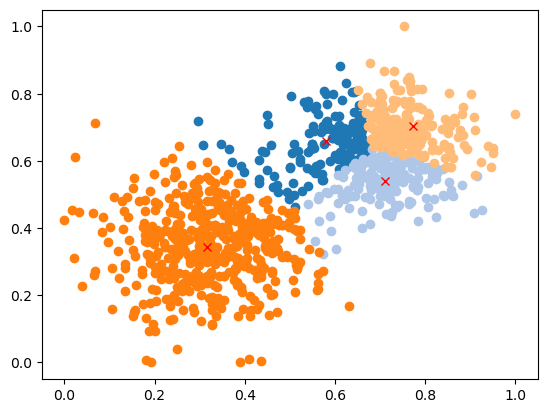

In [21]:
np.random.seed(659)   # supprimer cette ligne une fois la mise au point terminée

val_k = 4
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.05, 1000)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)



Pour k= 4 
Affichage des centres:  [[0.54367815 0.53330349]
 [0.30696871 0.33571071]
 [0.68064099 0.72238142]
 [0.77064999 0.58463762]]


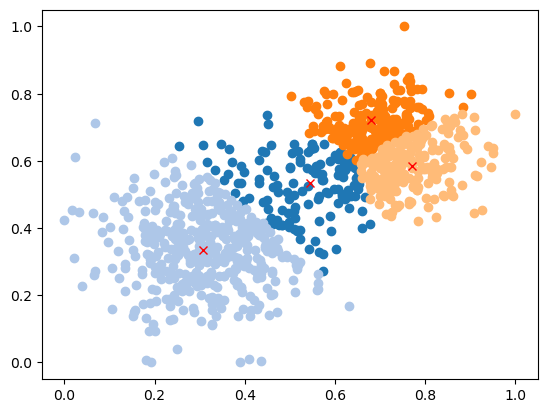

In [19]:
np.random.seed(56)   # supprimer cette ligne une fois la mise au point terminée

val_k = 4
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.05, 10)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)



Pour k= 4 
Affichage des centres:  [[0.68842573 0.47351854]
 [0.30646862 0.34306132]
 [0.62882307 0.61503569]
 [0.7487098  0.71609865]]


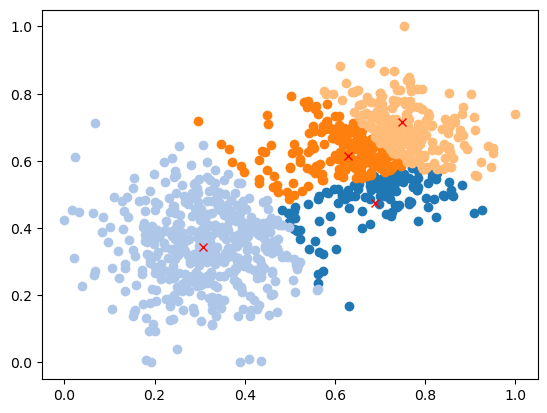

In [20]:
np.random.seed(270)   # supprimer cette ligne une fois la mise au point terminée

val_k = 4
les_centres, l_affectation = clust.kmoyennes(val_k, data_rand, 0.5, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_rand,les_centres,l_affectation)

